# Correcting for cables 

This notebook will load in the saved profiles we made, and then correct the profile range variables to account for cable lengths. The final product of this notebook will be a function that can be called at the beginning of other notebooks to make the adjustment. First, let's get an estimate of where the cables are. The proceeding cells are modified from another notebook. We need to remove the displacement on a seasonal basis

# Looking at near-surface reflector structure across seasons and stations

In [1]:
# Load libraries
import sys
import sys
sys.path.append("../../../xapres_package/")
import ApRESDefs
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 
import pickle

import xarray as xr
import importlib
import pandas as pd
import math
from datetime import datetime, timedelta, date
from scipy.stats import linregress
from helpers import *

importlib.reload(ApRESDefs)
xa = ApRESDefs.xapres(loglevel='debug')

DEBUG    17:01:48 	 ApRESDefs.py @function _setup_logging line 615 - Stream logging level set to DEBUG
DEBUG    17:01:48 	 ApRESDefs.py @function _setup_logging line 616 - Add console handler to logger
DEBUG    17:01:48 	 ApRESDefs.py @function _setup_logging line 629 - File logging level set to DEBUG


## A11

In [2]:
with open('../chirp_processing/A11_22S.pickle', 'rb') as handle:
    s22 = pickle.load(handle)

In [3]:
with open('../chirp_processing/A11_22W.pickle', 'rb') as handle:
    winter = pickle.load(handle)

In [4]:
a11 = xr.concat([abs(s22),abs(winter)],dim='time')

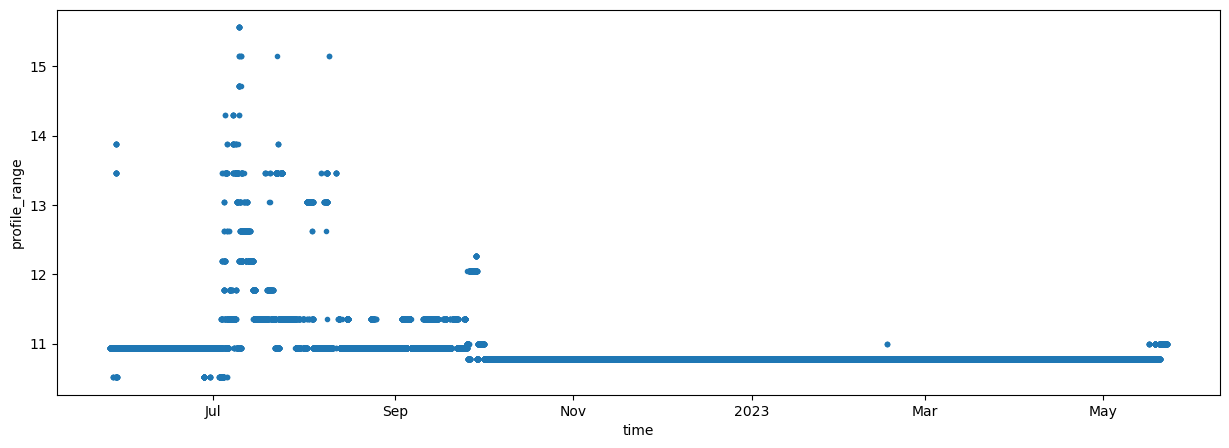

In [5]:
fig, ax = plt.subplots(figsize=(15,5))
a11.idxmax(dim='profile_range').plot(linestyle='none',marker='.')

Let's try plotting some of these profiles individually to see if the peak really does vary that much

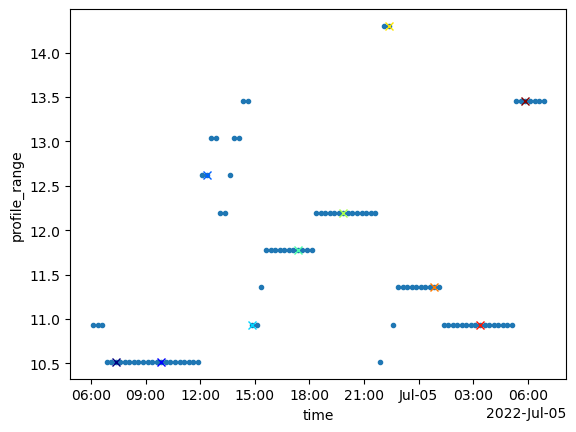

In [15]:
abs(s22).isel(time=range(3700,3800)).idxmax(dim='profile_range').plot(linestyle='none',marker='.')
colors = plt.cm.jet(np.linspace(0,1,10))
for i in range(10):
    plt.plot(abs(s22).isel(time=[3705+10*i]).time.values,abs(s22).isel(time=[3705+10*i]).idxmax(dim='profile_range'),linestyle='none',marker='x',color = colors[i])


Text(0.5, 1.0, ' ')

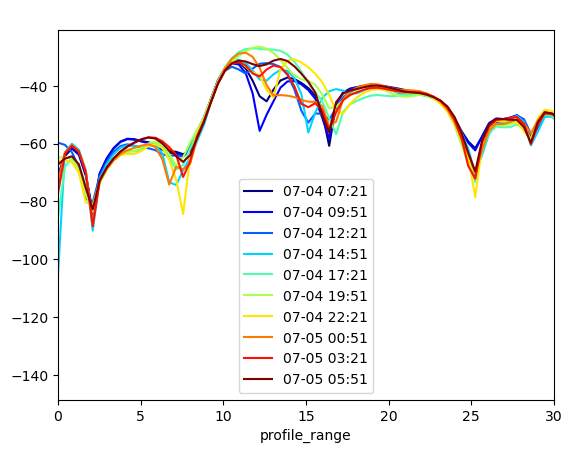

In [18]:
colors = plt.cm.jet(np.linspace(0,1,10))

for i in range(10):
    xa.dB(s22.isel(time=3705+10*i)).plot(label=f'{str(s22.time.values[3705+10*i]).replace("T"," ")[5:16]}',color = colors[i])
plt.xlim([0,30])
plt.legend()
plt.title(' ')

In [13]:
a11

<xarray.DataArray (time: 34659, profile_range: 9946)> Size: 3GB
array([[4.39846158e-04,            nan, 7.28427127e-04, ...,
                   nan,            nan, 4.25087836e-06],
       [5.12038984e-04,            nan, 6.97921074e-04, ...,
                   nan,            nan, 1.35897614e-05],
       [4.60197121e-04,            nan, 6.19440800e-04, ...,
                   nan,            nan, 6.65295871e-06],
       ...,
       [2.52830692e-04, 3.14321984e-04,            nan, ...,
        2.85665617e-06, 1.46651647e-06,            nan],
       [2.52643315e-04, 3.14788676e-04,            nan, ...,
        1.82244770e-06, 2.43227788e-06,            nan],
       [2.46590866e-04, 3.15057348e-04,            nan, ...,
        1.54103085e-06, 2.10161261e-06,            nan]])
Coordinates:
  * profile_range  (profile_range) float64 80kB 0.0 0.2114 ... 1.4e+03 1.4e+03
  * time           (time) datetime64[ns] 277kB 2022-05-26T17:06:29 ... 2023-0...
Attributes:
    centre_freq:  349995000.0
    bandwidth:    99990000.0
    start_freq:   300000000.0
    stop_fre:     399990000.0

Text(0.5, 1.0, 'A11 Winter')

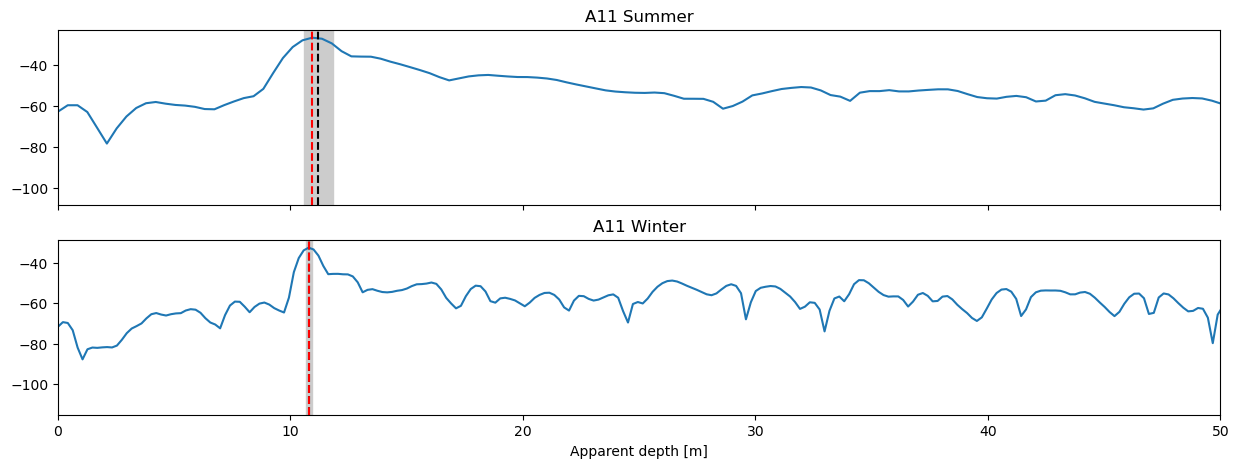

In [45]:
fig, axs = plt.subplots(nrows=2,figsize=(15,5),sharex=True)

a11_22s_mean = abs(s22).idxmax(dim='profile_range').mean()
a11_22s_median = abs(s22).idxmax(dim='profile_range').median()

a11_22s_std = abs(s22).idxmax(dim='profile_range').std()
xa.dB(s22).mean(dim='time').plot(ax=axs[0])
axs[0].set_xlim([0,50])
axs[0].axvline(a11_22s_mean,color='k',linestyle='--')
axs[0].axvline(a11_22s_median,color='r',linestyle='--')

axs[0].axvspan(a11_22s_mean-a11_22s_std,a11_22s_mean+a11_22s_std,color='0.8')

axs[0].set_xlabel('')
axs[0].set_title('A11 Summer')

a11_22w_mean = abs(winter).idxmax(dim='profile_range').mean()
a11_22w_median = abs(winter).idxmax(dim='profile_range').median()
a11_22w_std = abs(winter).idxmax(dim='profile_range').std()

xa.dB(winter).mean(dim='time').plot(ax=axs[1])
axs[1].set_xlim([0,50])
axs[1].axvline(a11_22w_mean,color='k',linestyle='--')
axs[1].axvline(a11_22w_median,color='r',linestyle='--')

axs[1].axvspan(a11_22w_mean-a11_22w_std,a11_22w_mean+a11_22w_std,color='0.8')
axs[1].set_xlabel('Apparent depth [m]')
axs[1].set_title('A11 Winter')

# A13

In [2]:
with open('../chirp_processing/A13_22S.pickle', 'rb') as handle:
    s22 = pickle.load(handle)

In [3]:
with open('../chirp_processing/A13_22W.pickle', 'rb') as handle:
    winter = pickle.load(handle)

In [4]:
with open('../chirp_processing/A13_23S.pickle', 'rb') as handle:
    s23 = pickle.load(handle)

In [49]:
a13 = xr.concat([abs(s22),abs(winter),abs(s23)],dim='time')


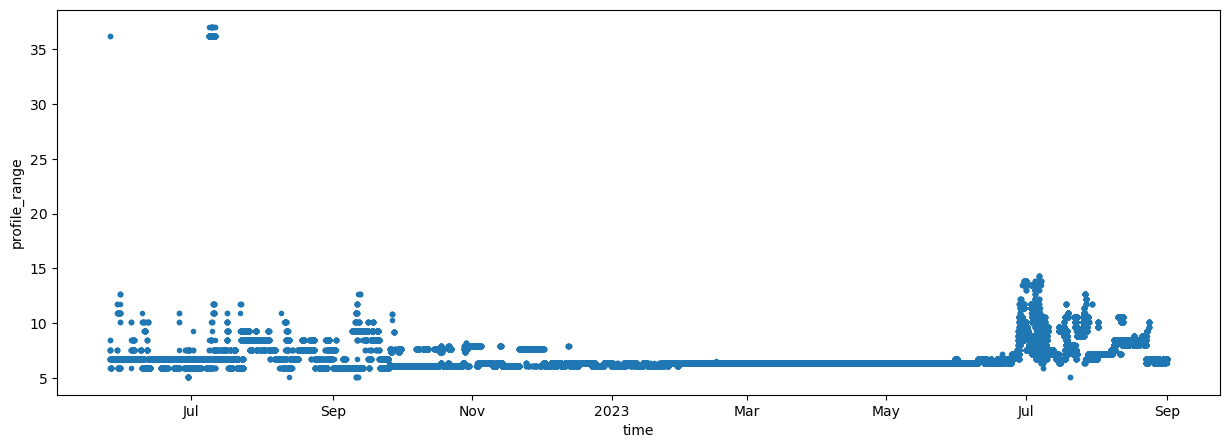

In [50]:
fig, ax = plt.subplots(figsize=(15,5))
a13.idxmax(dim='profile_range').plot(linestyle='none',marker='.',label = 'A13')


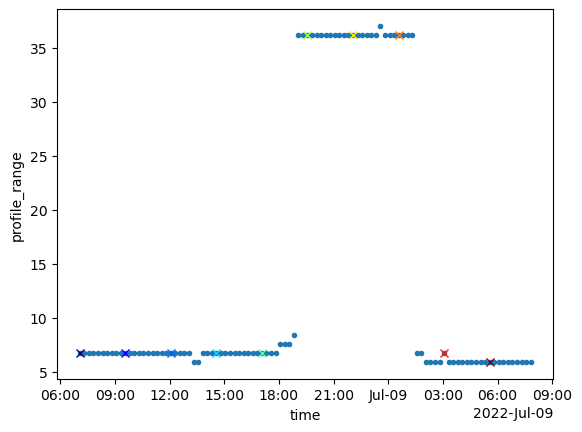

In [10]:
abs(s22).isel(time=range(4100,4200)).idxmax(dim='profile_range').plot(linestyle='none',marker='.')
colors = plt.cm.jet(np.linspace(0,1,10))
for i in range(10):
    plt.plot(abs(s22).isel(time=[4100+10*i]).time.values,abs(s22).isel(time=[4100+10*i]).idxmax(dim='profile_range'),linestyle='none',marker='x',color = colors[i])


Text(0.5, 1.0, ' ')

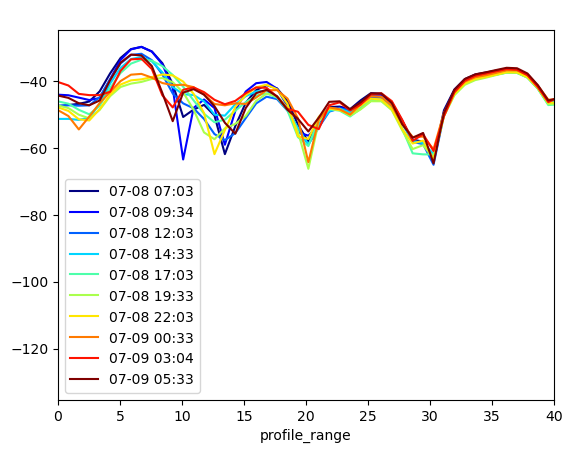

In [12]:
colors = plt.cm.jet(np.linspace(0,1,10))

for i in range(10):
    xa.dB(s22.isel(time=4100+10*i)).plot(label=f'{str(s22.time.values[4100+10*i]).replace("T"," ")[5:16]}',color = colors[i])
plt.xlim([0,40])
plt.legend()
plt.title(' ')

Text(0.5, 1.0, 'A13 Summer 23')

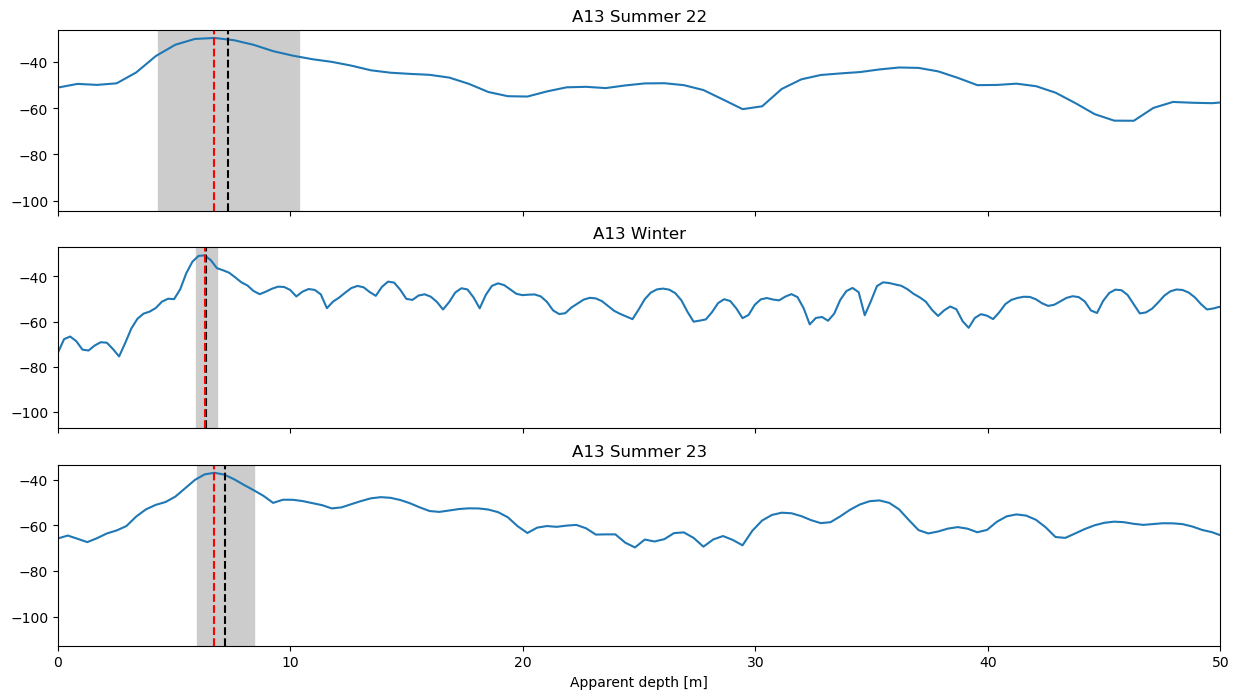

In [51]:
fig, axs = plt.subplots(nrows=3,figsize=(15,8),sharex=True)

a13_22s_mean = abs(s22).idxmax(dim='profile_range').mean()
a13_22s_median = abs(s22).idxmax(dim='profile_range').median()

a13_22s_std = abs(s22).idxmax(dim='profile_range').std()
xa.dB(s22).mean(dim='time').plot(ax=axs[0])
axs[0].set_xlim([0,50])
axs[0].axvline(a13_22s_mean,color='k',linestyle='--')
axs[0].axvline(a13_22s_median,color='r',linestyle='--')

axs[0].axvspan(a13_22s_mean-a13_22s_std,a13_22s_mean+a13_22s_std,color='0.8')

axs[0].set_xlabel('')
axs[0].set_title('A13 Summer 22')

a13_22w_mean = abs(winter).idxmax(dim='profile_range').mean()
a13_22w_median = abs(winter).idxmax(dim='profile_range').median()
a13_22w_std = abs(winter).idxmax(dim='profile_range').std()

xa.dB(winter).mean(dim='time').plot(ax=axs[1])
axs[1].set_xlim([0,50])
axs[1].axvline(a13_22w_mean,color='k',linestyle='--')
axs[1].axvline(a13_22w_median,color='r',linestyle='--')

axs[1].axvspan(a13_22w_mean-a13_22w_std,a13_22w_mean+a13_22w_std,color='0.8')
axs[1].set_xlabel('')
axs[1].set_title('A13 Winter')

a13_23s_mean = abs(s23).idxmax(dim='profile_range').mean()
a13_23s_median = abs(s23).idxmax(dim='profile_range').median()

a13_23s_std = abs(s23).idxmax(dim='profile_range').std()
xa.dB(s23).mean(dim='time').plot(ax=axs[2])
axs[2].set_xlim([0,50])
axs[2].axvline(a13_23s_mean,color='k',linestyle='--')
axs[2].axvline(a13_23s_median,color='r',linestyle='--')

axs[2].axvspan(a13_23s_mean-a13_23s_std,a13_23s_mean+a13_23s_std,color='0.8')

axs[2].set_xlabel('Apparent depth [m]')
axs[2].set_title('A13 Summer 23')

# A14

In [13]:
with open('../chirp_processing/A14_22S.pickle', 'rb') as handle:
    s22 = pickle.load(handle)

In [14]:
with open('../chirp_processing/A14_22W.pickle', 'rb') as handle:
    winter = pickle.load(handle)

In [15]:
with open('../chirp_processing/A14_23S.pickle', 'rb') as handle:
    s23 = pickle.load(handle)

In [55]:
a14 = xr.concat([abs(s22),abs(winter),abs(s23)],dim='time')


Text(0, 0.5, 'Depth of strongest reflector [m]')

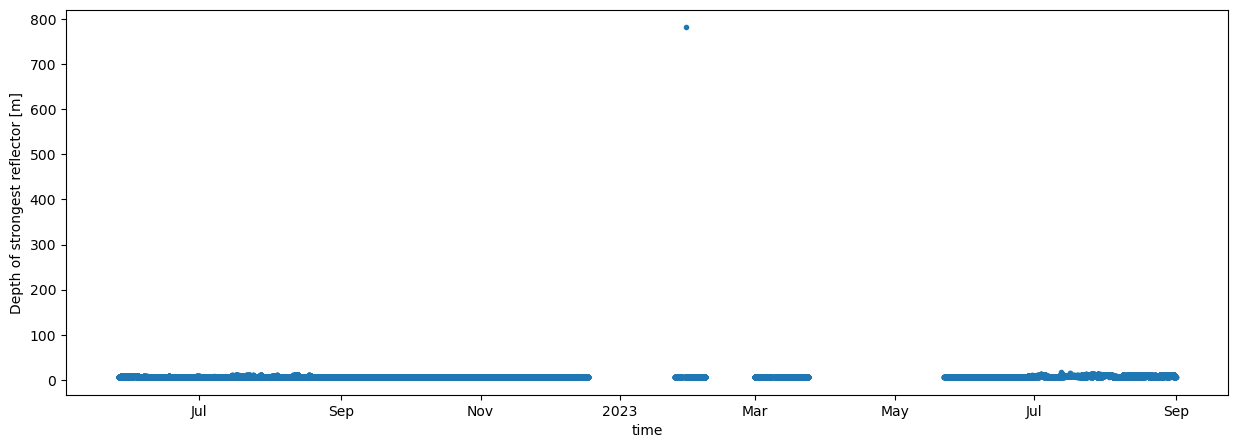

In [56]:
fig, ax = plt.subplots(figsize=(15,5))

a14.idxmax(dim='profile_range').plot(linestyle='none',marker='.',label = 'A14')
plt.ylabel('Depth of strongest reflector [m]')

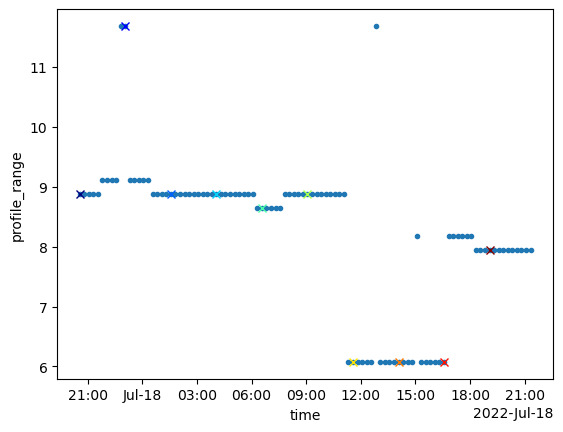

In [20]:
abs(s22).isel(time=range(5000,5100)).idxmax(dim='profile_range').plot(linestyle='none',marker='.')
colors = plt.cm.jet(np.linspace(0,1,10))
for i in range(10):
    plt.plot(abs(s22).isel(time=[5000+10*i]).time.values,abs(s22).isel(time=[5000+10*i]).idxmax(dim='profile_range'),linestyle='none',marker='x',color = colors[i])


Text(0.5, 1.0, ' ')

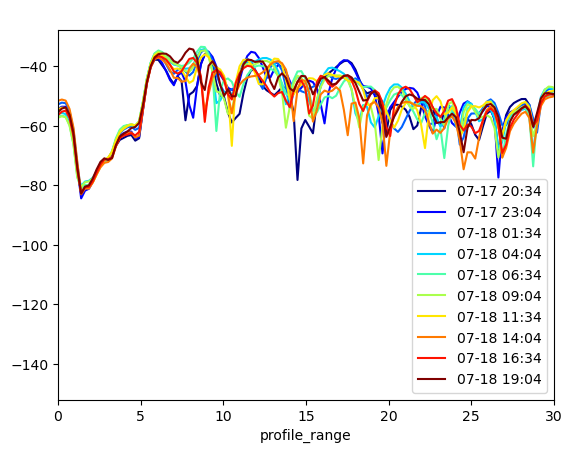

In [21]:
colors = plt.cm.jet(np.linspace(0,1,10))

for i in range(10):
    xa.dB(s22.isel(time=5000+10*i)).plot(label=f'{str(s22.time.values[5000+10*i]).replace("T"," ")[5:16]}',color = colors[i])
plt.xlim([0,30])
plt.legend()
plt.title(' ')

Text(0.5, 1.0, 'A14 Summer 23')

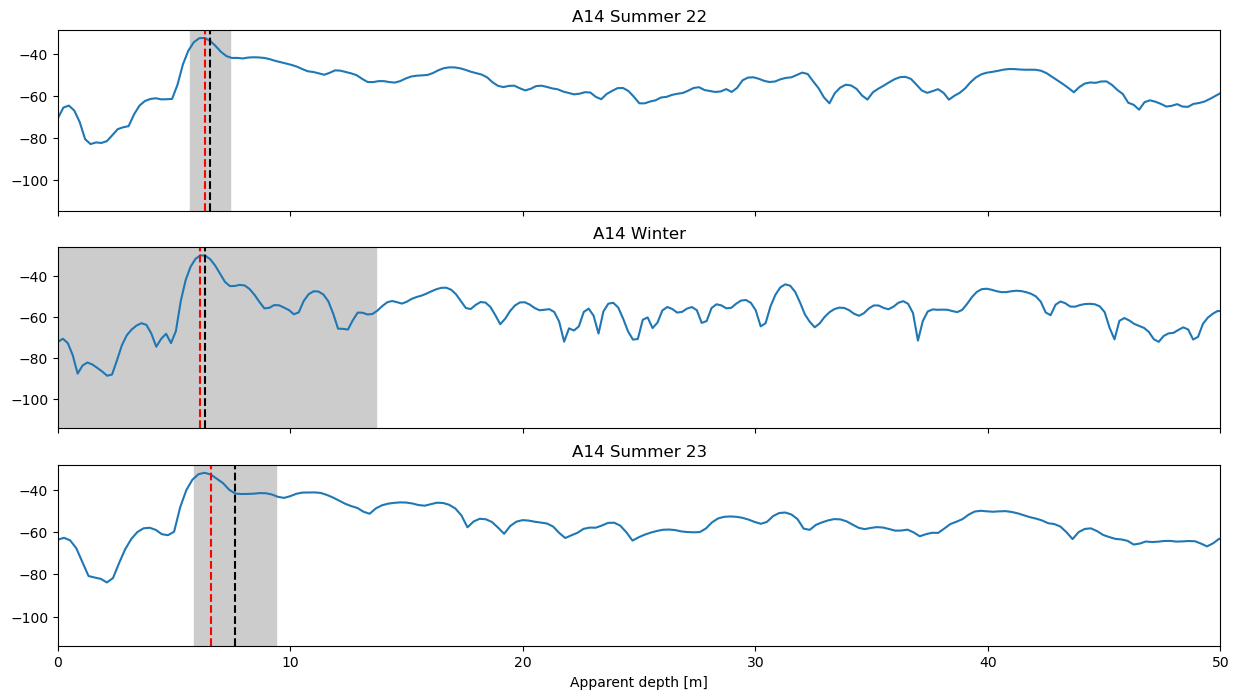

In [57]:
fig, axs = plt.subplots(nrows=3,figsize=(15,8),sharex=True)

a14_22s_mean = abs(s22).idxmax(dim='profile_range').mean()
a14_22s_median = abs(s22).idxmax(dim='profile_range').median()

a14_22s_std = abs(s22).idxmax(dim='profile_range').std()
xa.dB(s22).mean(dim='time').plot(ax=axs[0])
axs[0].set_xlim([0,50])
axs[0].axvline(a14_22s_mean,color='k',linestyle='--')
axs[0].axvline(a14_22s_median,color='r',linestyle='--')

axs[0].axvspan(a14_22s_mean-a14_22s_std,a14_22s_mean+a14_22s_std,color='0.8')

axs[0].set_xlabel('')
axs[0].set_title('A14 Summer 22')

a14_22w_mean = abs(winter).idxmax(dim='profile_range').mean()
a14_22w_median = abs(winter).idxmax(dim='profile_range').median()
a14_22w_std = abs(winter).idxmax(dim='profile_range').std()

xa.dB(winter).mean(dim='time').plot(ax=axs[1])
axs[1].set_xlim([0,50])
axs[1].axvline(a14_22w_mean,color='k',linestyle='--')
axs[1].axvline(a14_22w_median,color='r',linestyle='--')

axs[1].axvspan(a14_22w_mean-a14_22w_std,a14_22w_mean+a14_22w_std,color='0.8')
axs[1].set_xlabel('')
axs[1].set_title('A14 Winter')

a14_23s_mean = abs(s23).idxmax(dim='profile_range').mean()
a14_23s_median = abs(s23).idxmax(dim='profile_range').median()

a14_23s_std = abs(s23).idxmax(dim='profile_range').std()
xa.dB(s23).mean(dim='time').plot(ax=axs[2])
axs[2].set_xlim([0,50])
axs[2].axvline(a14_23s_mean,color='k',linestyle='--')
axs[2].axvline(a14_23s_median,color='r',linestyle='--')

axs[2].axvspan(a14_23s_mean-a14_23s_std,a14_23s_mean+a14_23s_std,color='0.8')

axs[2].set_xlabel('Apparent depth [m]')
axs[2].set_title('A14 Summer 23')

All together

Text(0, 0.5, 'Depth of strongest reflector [m]')

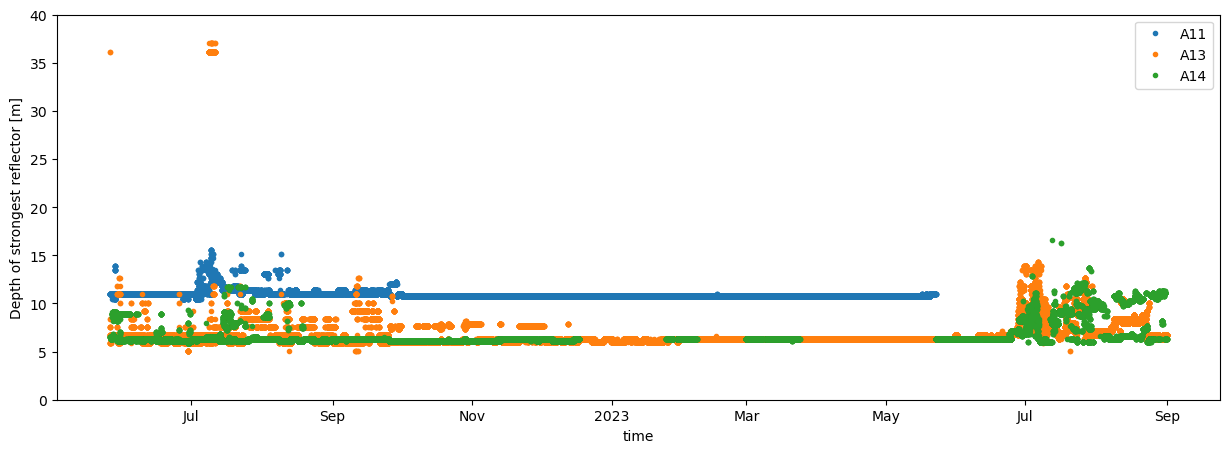

In [45]:
fig, ax = plt.subplots(figsize=(15,5))
a11.idxmax(dim='profile_range').plot(linestyle='none',marker='.',label = 'A11')
a13.idxmax(dim='profile_range').plot(linestyle='none',marker='.',label = 'A13')
a14.idxmax(dim='profile_range').plot(linestyle='none',marker='.',label = 'A14')
plt.legend()
plt.ylim([0,40])
plt.ylabel('Depth of strongest reflector [m]')

Now we want to see if taking the median of these max values is an appropiate estimate of where the cable/surface reflectors are. NEED TO DO THIS AT EACH INDIVIDUAL SEASON, BECAUSE DIFFERENT SPATIAL RESOLUTIONS

In [48]:
a11_peak = a11.idxmax(dim='profile_range').median()
a13_peak = a13.idxmax(dim='profile_range').median()
a14_peak = a14.idxmax(dim='profile_range').median()

## Example with lake drainage

In [2]:
from dask.distributed import Client

client = Client("tcp://127.0.0.1:40279")
client

<Client: 'tcp://127.0.0.1:40279' processes=4 threads=16, memory=125.80 GiB>

In [3]:
# Load data
ds_11 = reload("A101")
ds_11 = ds_11.isel(time=range(20,len(ds_11.time))) # trim first few bursts, which were tests

ds_13 = reload("A103_fixed")
ds_13 = ds_13.isel(time=range(60,len(ds_13.time))) # trim first few bursts, which were tests

ds_14 = reload("A104")
ds_14 = ds_14.isel(time=range(50,len(ds_14.time))) # trim first few bursts, which were tests



In [125]:
ds_11_drain = ds_11.isel(time=range(4200,5200))
test = custom_profile(ds_11_drain.isel(attenuator_setting_pair=0).chirp,clip_threshold=1.2,min_chirps = 5,start=20000)
time_to_interp = pd.date_range("2022-07-09 12:00", "2022-07-19 12:00", freq="15min")
interp_profiles = test.interp(time=time_to_interp,method='linear')
interp_profiles['doy_decimal'] = interp_profiles.time.dt.dayofyear + (interp_profiles.time.dt.hour / 24) + (interp_profiles.time.dt.minute / 1440) + (interp_profiles.time.dt.second / 86400)


(200.0, 0.0)

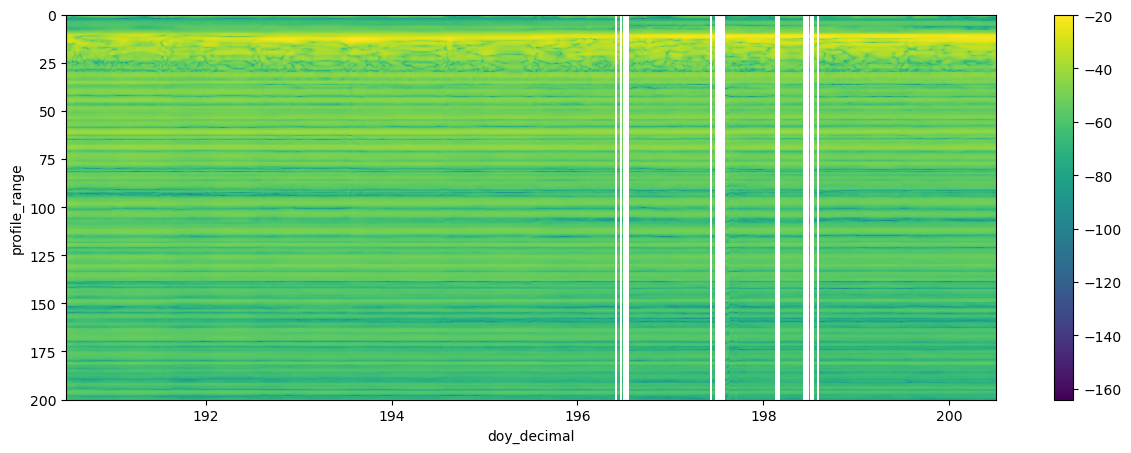

In [30]:
fig, ax = plt.subplots(figsize=(15,5))
xa.dB(interp_profiles).plot(x='doy_decimal')
ax.invert_yaxis()
#import datetime
#xlim=[datetime.date(2022, 12, 1), datetime.date(2023, 4, 1)]
plt.ylim([200,0])

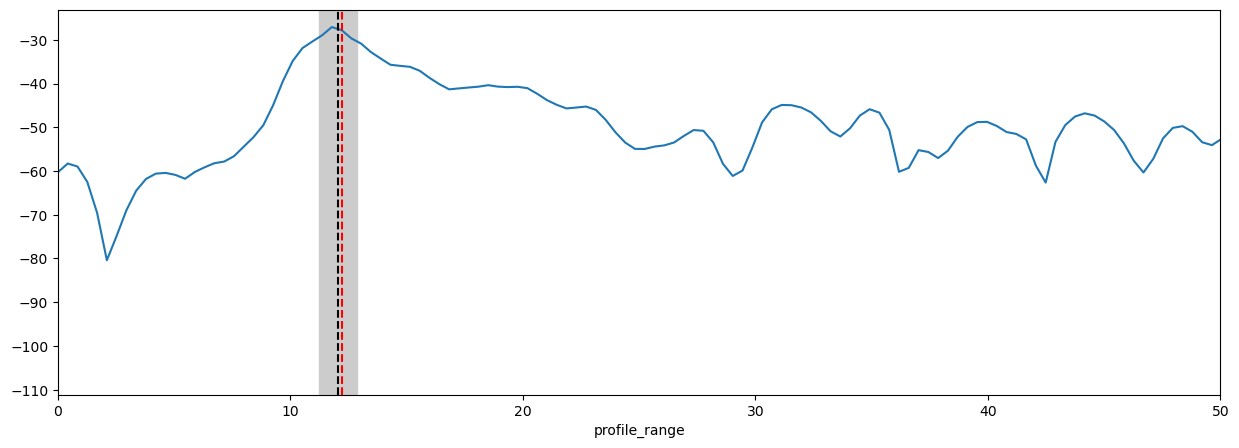

In [31]:
fig, ax = plt.subplots(figsize=(15,5))
a13_22s_mean = abs(interp_profiles).idxmax(dim='profile_range').mean()
a13_22s_median = abs(interp_profiles).idxmax(dim='profile_range').median()

a13_22s_std = abs(interp_profiles).idxmax(dim='profile_range').std()
xa.dB(interp_profiles).mean(dim='time').plot(ax=ax)
ax.set_xlim([0,50])
ax.axvline(a13_22s_mean,color='k',linestyle='--')
ax.axvline(a13_22s_median,color='r',linestyle='--')

ax.axvspan(a13_22s_mean-a13_22s_std,a13_22s_mean+a13_22s_std,color='0.8')

let's say we move everything by 25 m

In [52]:
def shift_profile_range(profiles,shift_value):
    profiles_adjust = profiles.where(profiles.profile_range > shift_value, drop = True)
    profiles_adjust['profile_range'] = profiles_adjust.profile_range - shift_value
    return profiles_adjust

In [126]:
interp_profiles_adjust = shift_profile_range(interp_profiles,35)

(0.0, 100.0)

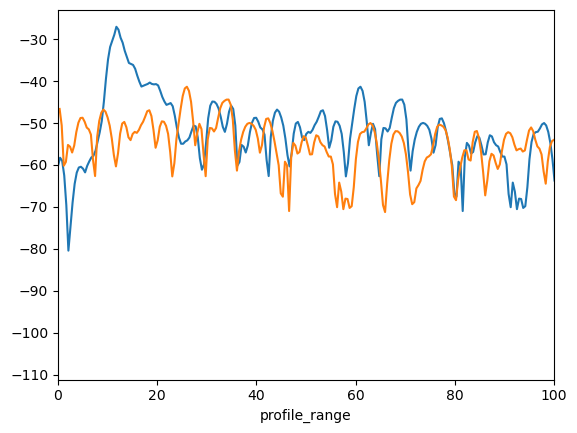

In [54]:
xa.dB(interp_profiles).mean(dim='time').plot()
xa.dB(interp_profiles_adjust).mean(dim='time').plot()

plt.xlim([0,100])

In [86]:
def strain_metrics(ds, win_cor, step, lag, noise_floor,bin_adjust=1):
    # This function, given a window, and step, gives a total percentage of data that has high coherence
    b1 = ds.isel(time=range(0,len(ds)-lag))
    b2 = ds.isel(time=range(lag,len(ds)))
    dz, co, phi = xa.generate_range_diff(b1,b2,win_cor,step,None,0,0.95)
    dz=dz.assign(coherence=(['time','profile_range'],co))
    dz_new = dz.where(abs(dz.coherence) > 0.95).drop_duplicates('time')

    vv = dz_new.range_diff / dz_new.time_diff * 31536000
    vv_adjust = vv - vv.isel(profile_range = range(0,bin_adjust)).mean(dim='profile_range')
    vv_err = dz_new.err / dz_new.time_diff * 31536000
    vv_mean_err = (vv_err.isel(profile_range = range(0,bin_adjust))**2).sum(dim='profile_range')/bin_adjust
    vv_adjust_err = np.sqrt(vv_err**2 + vv_mean_err)

    #fit=vv.where(vv.profile_range <=noise_floor).polyfit('profile_range',1,full=True)
    fit=vv.where(vv.profile_range <=noise_floor).polyfit('profile_range',1,full=True)
    r2 = 1-fit.polyfit_residuals/((vv.where(vv.profile_range <=noise_floor)-vv.where(vv.profile_range <=noise_floor).mean())**2).sum(dim='profile_range')
    
    slope = fit.polyfit_coefficients.sel(degree=1)*vv.profile_range+fit.polyfit_coefficients.sel(degree=0)
    residual = vv-slope
    residual = residual.where(residual.profile_range <=noise_floor,drop=True)
    slope_errs = np.sqrt((1/(len(residual.profile_range)-2))*(((residual**2).sum(dim='profile_range'))/((residual.profile_range - residual.profile_range.mean())**2).sum()))

    int_err = slope_errs*np.sqrt(((vv.profile_range)**2).sum()/len(vv.profile_range))
    ds = vv.to_dataset(name='vv')
    ds['err'] = vv_err
    ds['slope']= fit.polyfit_coefficients.sel(degree=1)
    ds['intercept']=fit.polyfit_coefficients.sel(degree=0)
    ds['fit'] = slope
    ds['slope_err'] = slope_errs
    ds['int_err'] = int_err
    ds['vv_adjust'] = vv_adjust
    ds['vv_adjust_err'] = vv_adjust_err
    ds['doy_decimal'] =  ds.time.dt.dayofyear + (ds.time.dt.hour / 24) + (ds.time.dt.minute / 1440) + (ds.time.dt.second / 86400)
    return ds
    
def plot_fits(ds,ds_adjust,xlims=False):
    fig, axs = plt.subplots(nrows=1,figsize=(15,6),sharex=True)
    axs.errorbar(ds.doy_decimal,ds.slope,yerr=ds.slope_err,marker='.',ecolor='k',label = 'No profile_range correction')
    axs.errorbar(ds_adjust.doy_decimal,ds_adjust.slope,yerr=ds_adjust.slope_err,marker='.',ecolor='r',label = 'With shifted range')
    axs.legend()
    if xlims:
        axs.set_xlim(xlims)
    axs.set_ylabel('Strain rate [y$^{-1}$]')
    axs.set_title('Strain rate estimates')
    
    axs.set_xlabel('DOY 2022')

def convert_to_doy(da):
    da['doy_decimal'] = da.time.dt.dayofyear + (da.time.dt.hour / 24) + (da.time.dt.minute / 1440) + (da.time.dt.second / 86400)
    return da



In [127]:
a11 = strain_metrics(interp_profiles, 50, 50,1,500)
a11_adjust = strain_metrics(interp_profiles_adjust, 50, 50,1,500,2)


/home/jovyan/xapres_package/notebooks/test_notes/chirp_processing/../../../xapres_package/ApRESDefs.py:654: RuntimeWarning: invalid value encountered in divide
  c = top/bottom
/home/jovyan/xapres_package/notebooks/test_notes/chirp_processing/../../../xapres_package/ApRESDefs.py:654: RuntimeWarning: invalid value encountered in divide
  c = top/bottom


(100.0, 0.0)

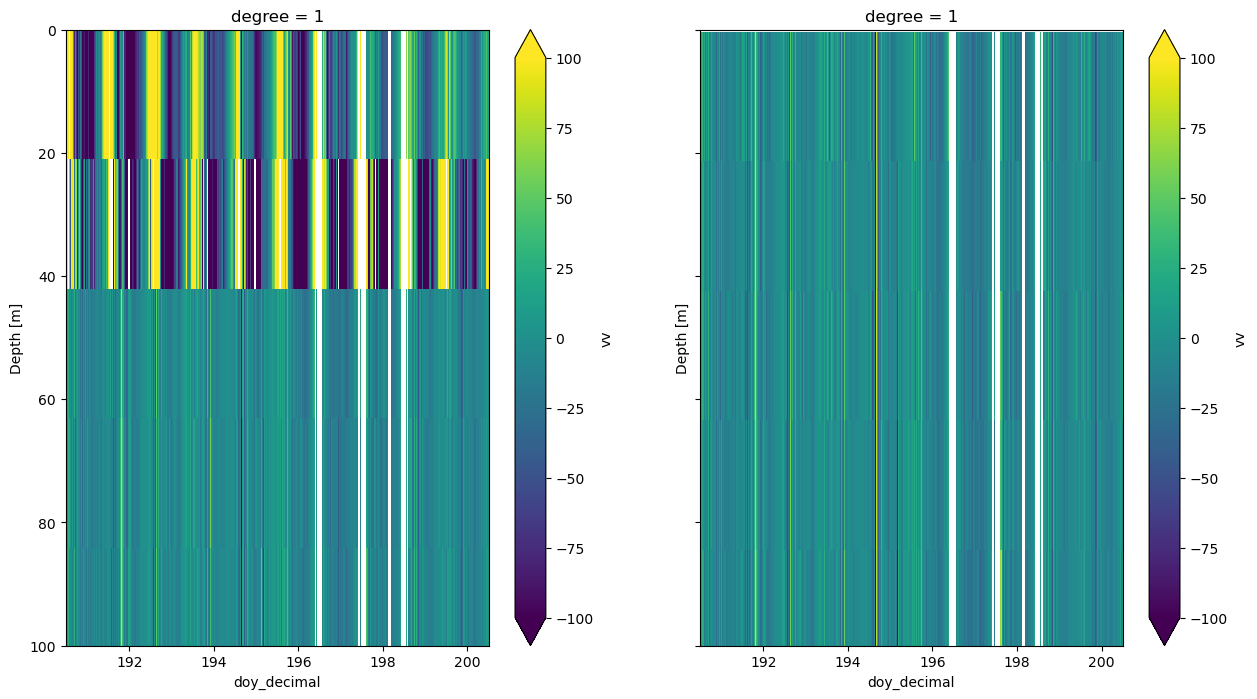

In [128]:
vv = convert_to_doy(a11.vv)
vv_shift = convert_to_doy(a11_adjust.vv)

fig, axs = plt.subplots(ncols=2,figsize=(15,8),sharey=True)

vv.plot(ax=axs[0],x='doy_decimal',vmin=-100,vmax=100)
vv_shift.plot(ax=axs[1],x='doy_decimal',vmin=-100,vmax=100)
plt.gca().invert_yaxis()
plt.ylim([100,0])

(200.0, 0.0)

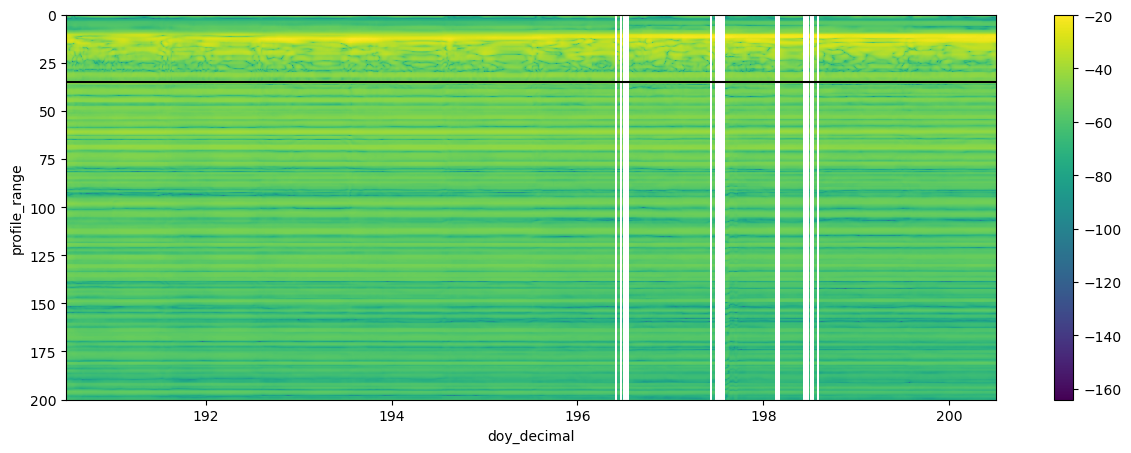

In [82]:
fig, ax = plt.subplots(figsize=(15,5))
xa.dB(interp_profiles).plot(x='doy_decimal')
ax.invert_yaxis()
#import datetime
#xlim=[datetime.date(2022, 12, 1), datetime.date(2023, 4, 1)]
ax.axhline(35, color = 'k')
plt.ylim([200,0])

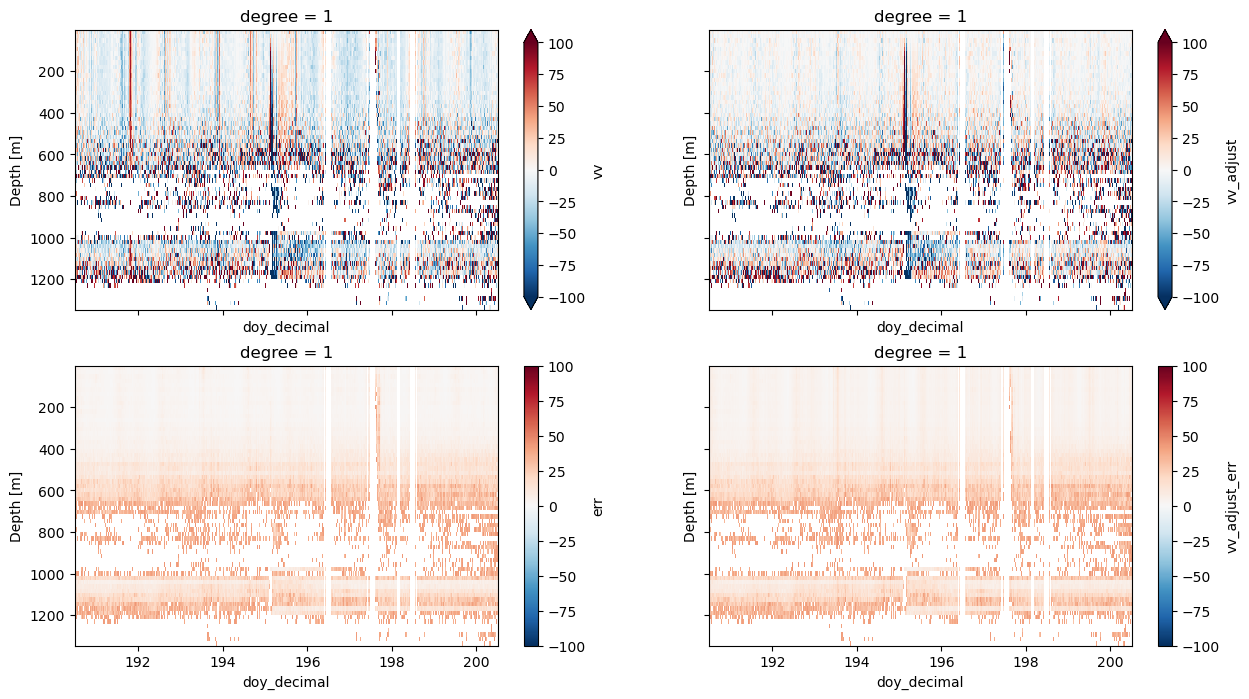

In [129]:
vv = convert_to_doy(a11_adjust.vv)
vv_shift = convert_to_doy(a11_adjust.vv_adjust)

err = convert_to_doy(a11_adjust.err)
err_shift = convert_to_doy(a11_adjust.vv_adjust_err)
fig, axs = plt.subplots(ncols=2,nrows = 2, figsize=(15,8),sharey=True,sharex=True)

vv.plot(ax=axs[0][0],x='doy_decimal',vmin=-100,vmax=100,cmap='RdBu_r')
vv_shift.plot(ax=axs[0][1],x='doy_decimal',vmin=-100,vmax=100,cmap='RdBu_r')

err.plot(ax=axs[1][0],x='doy_decimal',vmin=-100,vmax=100,cmap='RdBu_r')
err_shift.plot(ax=axs[1][1],x='doy_decimal',vmin=-100,vmax=100,cmap='RdBu_r')
plt.gca().invert_yaxis()
#plt.ylim([100,0])

In [64]:
vv.profile_range

<xarray.DataArray 'profile_range' (profile_range: 64)> Size: 512B
array([  10.847708,   31.878767,   52.909826,   73.940885,   94.971944,
        116.003003,  137.034062,  158.065121,  179.096179,  200.127238,
        221.158297,  242.189356,  263.220415,  284.251474,  305.282533,
        326.313592,  347.344651,  368.375709,  389.406768,  410.437827,
        431.468886,  452.499945,  473.531004,  494.562063,  515.593122,
        536.62418 ,  557.655239,  578.686298,  599.717357,  620.748416,
        641.779475,  662.810534,  683.841593,  704.872652,  725.90371 ,
        746.934769,  767.965828,  788.996887,  810.027946,  831.059005,
        852.090064,  873.121123,  894.152182,  915.18324 ,  936.214299,
        957.245358,  978.276417,  999.307476, 1020.338535, 1041.369594,
       1062.400653, 1083.431711, 1104.46277 , 1125.493829, 1146.524888,
       1167.555947, 1188.587006, 1209.618065, 1230.649124, 1251.680183,
       1272.711241, 1293.7423  , 1314.773359, 1335.804418])
Coordinates:
  * profile_range  (profile_range) float64 512B 10.85 31.88 ... 1.336e+03
    degree         int64 8B 1
Attributes:
    units:      m
    long_name:  Depth

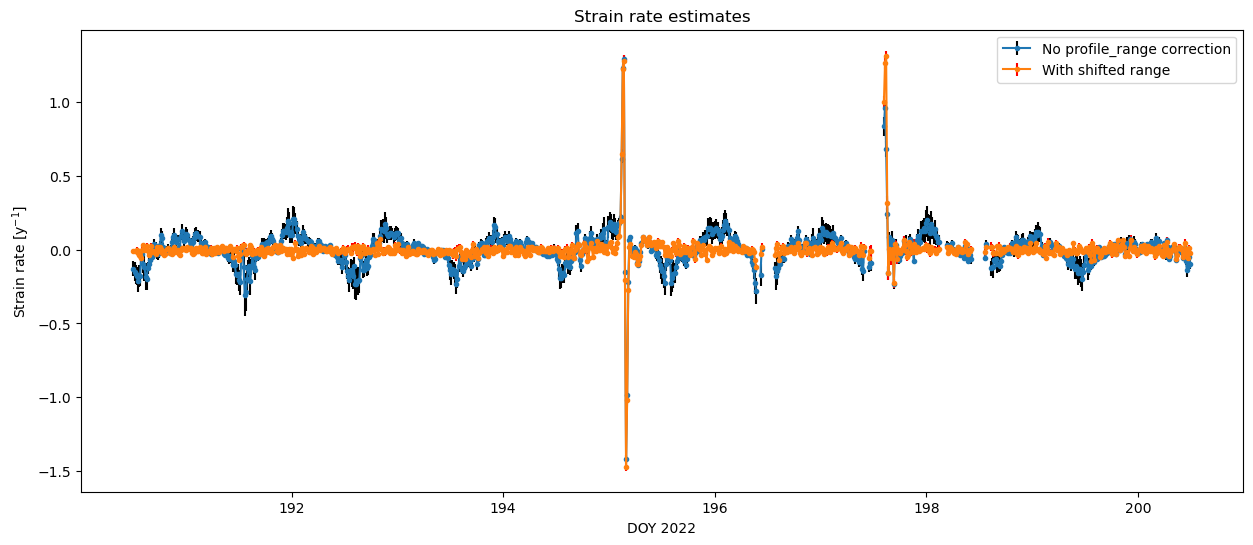

In [130]:
plot_fits(a11,a11_adjust)

# Looking at cable correction for other lake drainage timeseries
For 2022:
- A11: 35 m

In [131]:
# A13
ds_13_drain = ds_13.isel(time=range(4200,5200))
test = custom_profile(ds_13_drain.isel(attenuator_setting_pair=0).chirp,clip_threshold=1.2,min_chirps = 5,start=30000)
time_to_interp = pd.date_range("2022-07-09 12:00", "2022-07-19 12:00", freq="15min")
interp_profiles = test.interp(time=time_to_interp,method='linear')
interp_profiles['doy_decimal'] = interp_profiles.time.dt.dayofyear + (interp_profiles.time.dt.hour / 24) + (interp_profiles.time.dt.minute / 1440) + (interp_profiles.time.dt.second / 86400)


(200.0, 0.0)

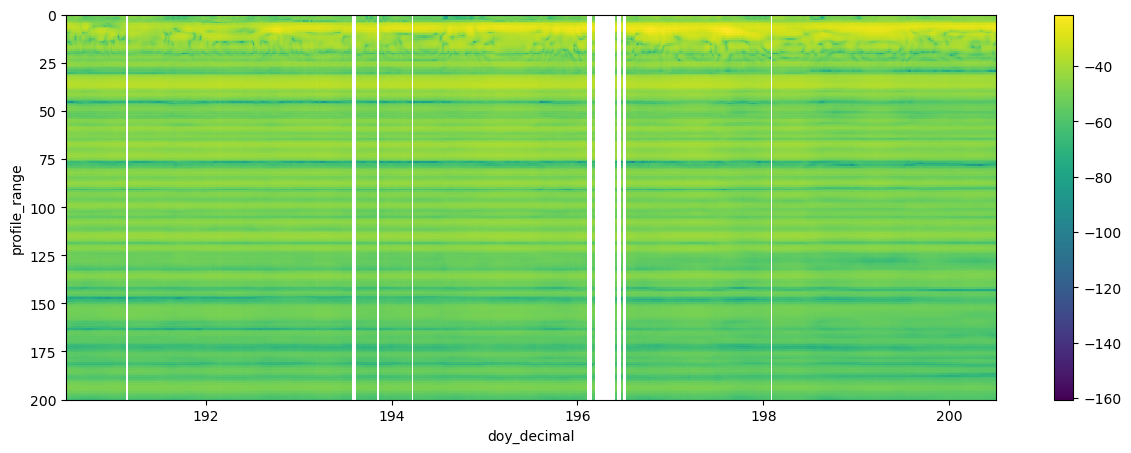

In [132]:
fig, ax = plt.subplots(figsize=(15,5))
xa.dB(interp_profiles).plot(x='doy_decimal')
ax.invert_yaxis()
#import datetime
#xlim=[datetime.date(2022, 12, 1), datetime.date(2023, 4, 1)]
plt.ylim([200,0])

In [133]:
interp_profiles_adjust = shift_profile_range(interp_profiles,25)

(0.0, 100.0)

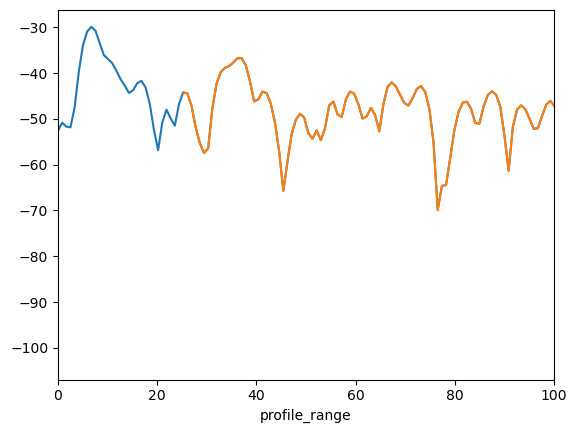

In [134]:
xa.dB(interp_profiles).mean(dim='time').plot()
xa.dB(interp_profiles.where(interp_profiles.profile_range > 25)).mean(dim='time').plot()

plt.xlim([0,100])

In [135]:
a13 = strain_metrics(interp_profiles, 24, 24,1,500)
a13_adjust = strain_metrics(interp_profiles_adjust, 24, 24,1,500,1)


/home/jovyan/xapres_package/notebooks/test_notes/chirp_processing/../../../xapres_package/ApRESDefs.py:654: RuntimeWarning: invalid value encountered in divide
  c = top/bottom
/home/jovyan/xapres_package/notebooks/test_notes/chirp_processing/../../../xapres_package/ApRESDefs.py:654: RuntimeWarning: invalid value encountered in divide
  c = top/bottom


(100.0, 0.0)

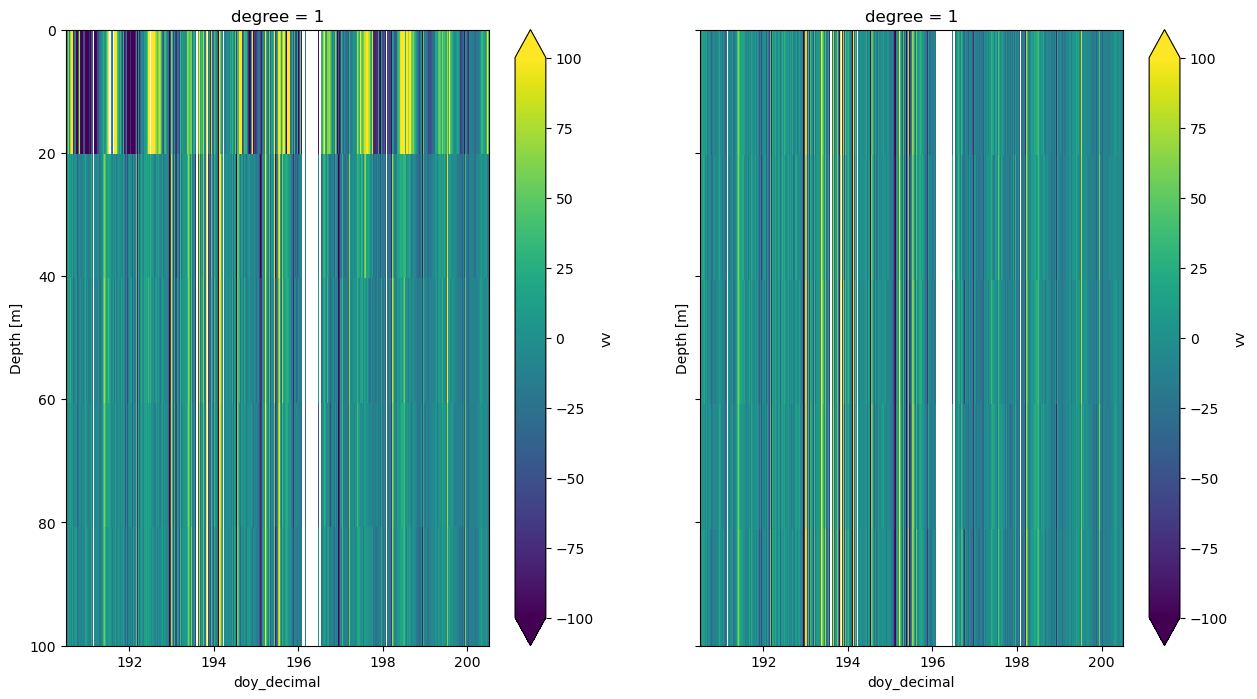

In [136]:
vv = convert_to_doy(a13.vv)
vv_shift = convert_to_doy(a13_adjust.vv)

fig, axs = plt.subplots(ncols=2,figsize=(15,8),sharey=True)

vv.plot(ax=axs[0],x='doy_decimal',vmin=-100,vmax=100)
vv_shift.plot(ax=axs[1],x='doy_decimal',vmin=-100,vmax=100)
plt.gca().invert_yaxis()
plt.ylim([100,0])

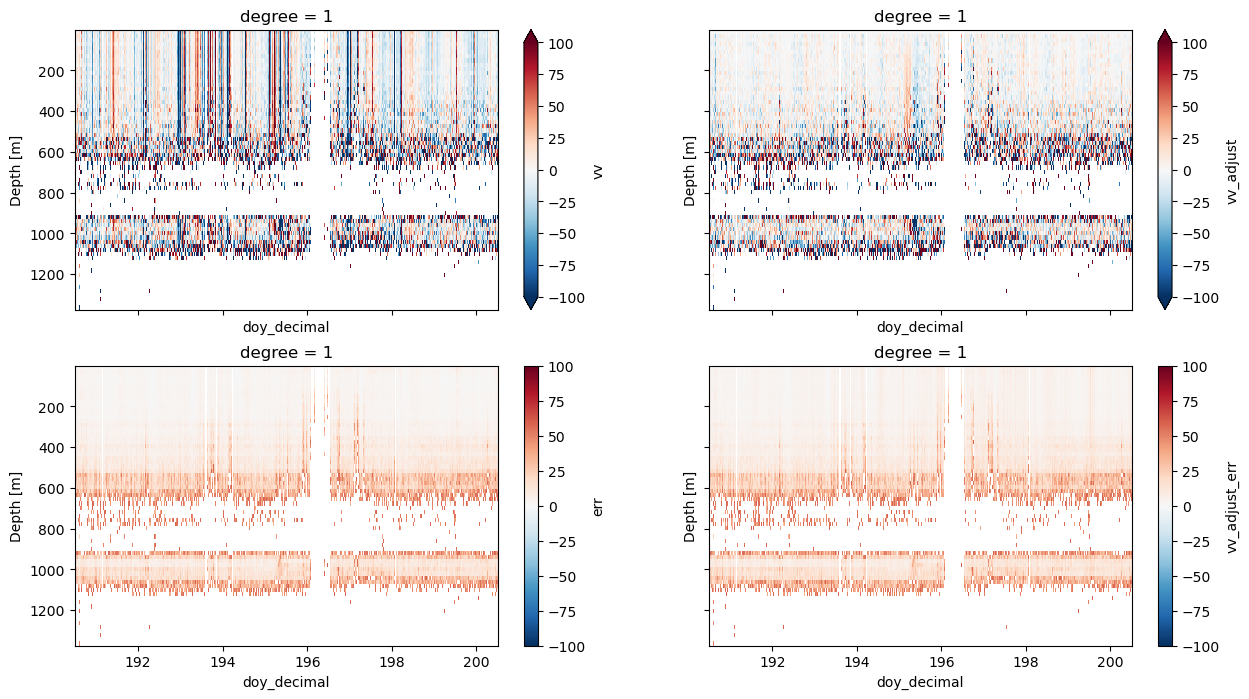

In [137]:
vv = convert_to_doy(a13_adjust.vv)
vv_shift = convert_to_doy(a13_adjust.vv_adjust)

err = convert_to_doy(a13_adjust.err)
err_shift = convert_to_doy(a13_adjust.vv_adjust_err)
fig, axs = plt.subplots(ncols=2,nrows = 2, figsize=(15,8),sharey=True,sharex=True)

vv.plot(ax=axs[0][0],x='doy_decimal',vmin=-100,vmax=100,cmap='RdBu_r')
vv_shift.plot(ax=axs[0][1],x='doy_decimal',vmin=-100,vmax=100,cmap='RdBu_r')

err.plot(ax=axs[1][0],x='doy_decimal',vmin=-100,vmax=100,cmap='RdBu_r')
err_shift.plot(ax=axs[1][1],x='doy_decimal',vmin=-100,vmax=100,cmap='RdBu_r')
plt.gca().invert_yaxis()
#plt.ylim([100,0])

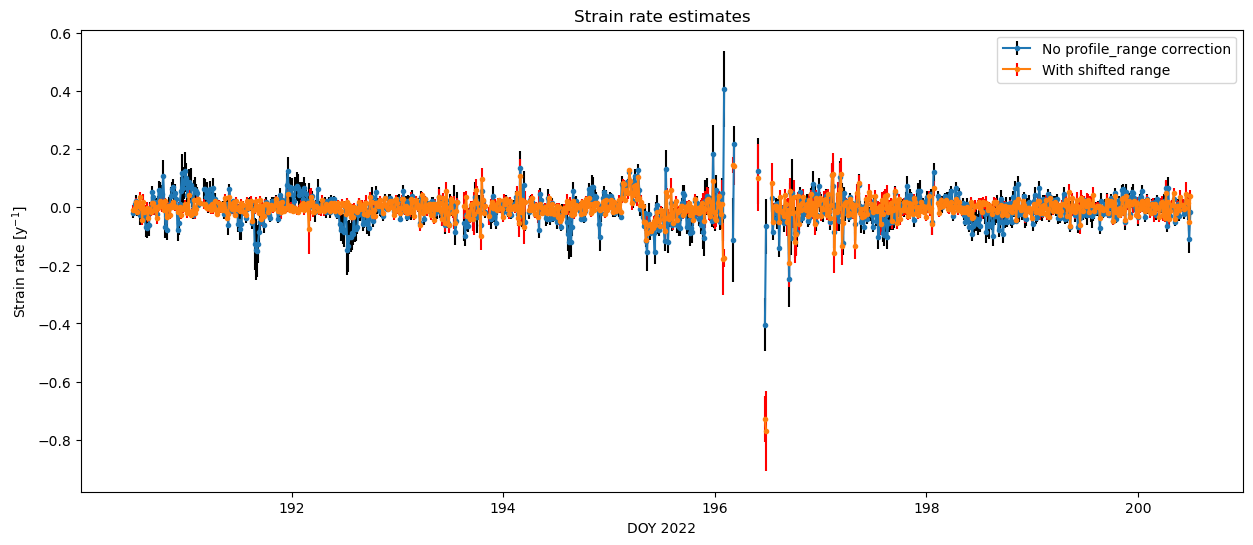

In [138]:
plot_fits(a13,a13_adjust)

In [139]:
ds_14_drain = ds_14.isel(time=range(4200,5200))
test = custom_profile(ds_14_drain.isel(attenuator_setting_pair=0).chirp,clip_threshold=1.2,min_chirps = 5,start=4000)
time_to_interp = pd.date_range("2022-07-09 12:00", "2022-07-19 12:00", freq="15min")
interp_profiles = test.interp(time=time_to_interp,method='linear')
interp_profiles['doy_decimal'] = interp_profiles.time.dt.dayofyear + (interp_profiles.time.dt.hour / 24) + (interp_profiles.time.dt.minute / 1440) + (interp_profiles.time.dt.second / 86400)


(200.0, 0.0)

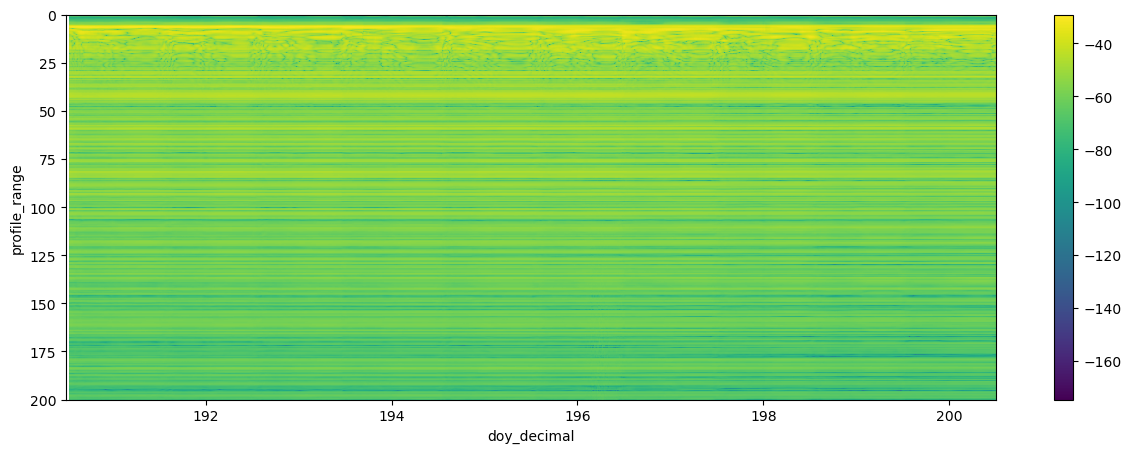

In [140]:
fig, ax = plt.subplots(figsize=(15,5))
xa.dB(interp_profiles).plot(x='doy_decimal')
ax.invert_yaxis()
#import datetime
#xlim=[datetime.date(2022, 12, 1), datetime.date(2023, 4, 1)]
plt.ylim([200,0])

In [149]:
interp_profiles_adjust = shift_profile_range(interp_profiles,35)

(0.0, 100.0)

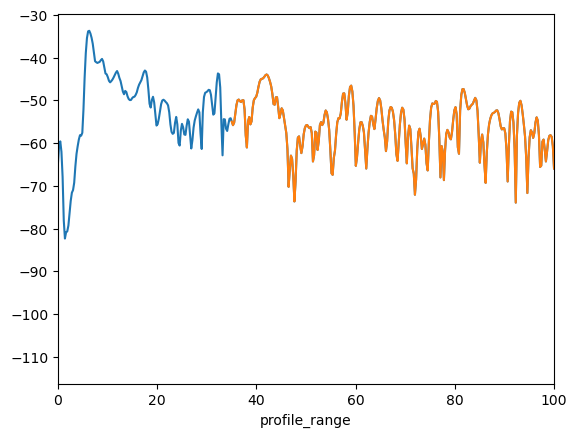

In [150]:
xa.dB(interp_profiles).mean(dim='time').plot()
xa.dB(interp_profiles.where(interp_profiles.profile_range > 35)).mean(dim='time').plot()

plt.xlim([0,100])

In [159]:
a14 = strain_metrics(interp_profiles, 80, 80,1,500)
a14_adjust = strain_metrics(interp_profiles_adjust, 80, 80,1,500,1)


/home/jovyan/xapres_package/notebooks/test_notes/chirp_processing/../../../xapres_package/ApRESDefs.py:654: RuntimeWarning: invalid value encountered in divide
  c = top/bottom
/home/jovyan/xapres_package/notebooks/test_notes/chirp_processing/../../../xapres_package/ApRESDefs.py:654: RuntimeWarning: invalid value encountered in divide
  c = top/bottom


(100.0, 0.0)

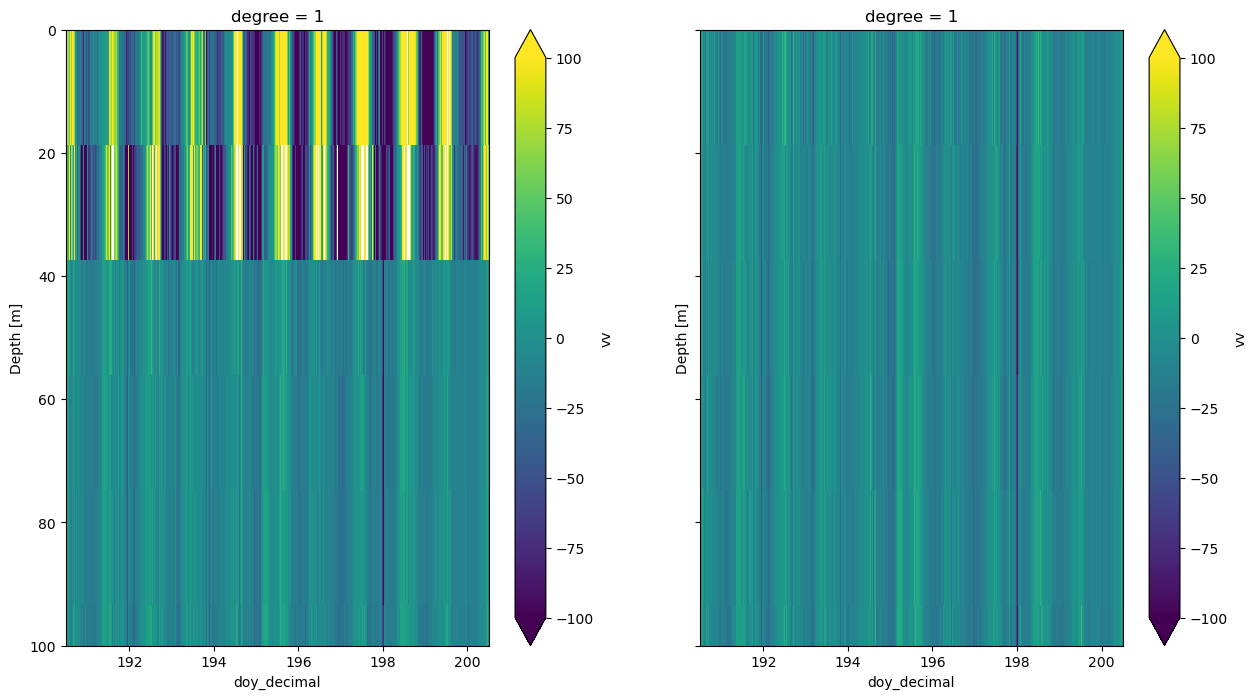

In [160]:
vv = convert_to_doy(a14.vv)
vv_shift = convert_to_doy(a14_adjust.vv)

fig, axs = plt.subplots(ncols=2,figsize=(15,8),sharey=True)

vv.plot(ax=axs[0],x='doy_decimal',vmin=-100,vmax=100)
vv_shift.plot(ax=axs[1],x='doy_decimal',vmin=-100,vmax=100)
plt.gca().invert_yaxis()
plt.ylim([100,0])

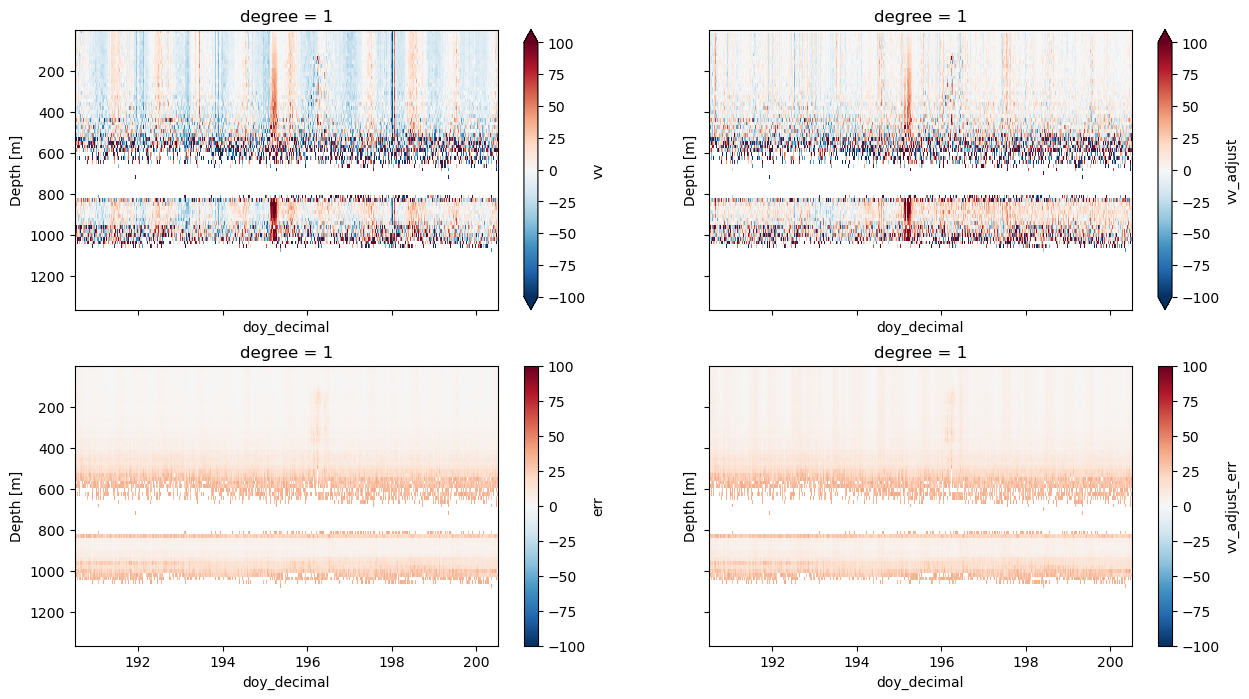

In [161]:
vv = convert_to_doy(a14_adjust.vv)
vv_shift = convert_to_doy(a14_adjust.vv_adjust)

err = convert_to_doy(a14_adjust.err)
err_shift = convert_to_doy(a14_adjust.vv_adjust_err)
fig, axs = plt.subplots(ncols=2,nrows = 2, figsize=(15,8),sharey=True,sharex=True)

vv.plot(ax=axs[0][0],x='doy_decimal',vmin=-100,vmax=100,cmap='RdBu_r')
vv_shift.plot(ax=axs[0][1],x='doy_decimal',vmin=-100,vmax=100,cmap='RdBu_r')

err.plot(ax=axs[1][0],x='doy_decimal',vmin=-100,vmax=100,cmap='RdBu_r')
err_shift.plot(ax=axs[1][1],x='doy_decimal',vmin=-100,vmax=100,cmap='RdBu_r')
plt.gca().invert_yaxis()
#plt.ylim([100,0])

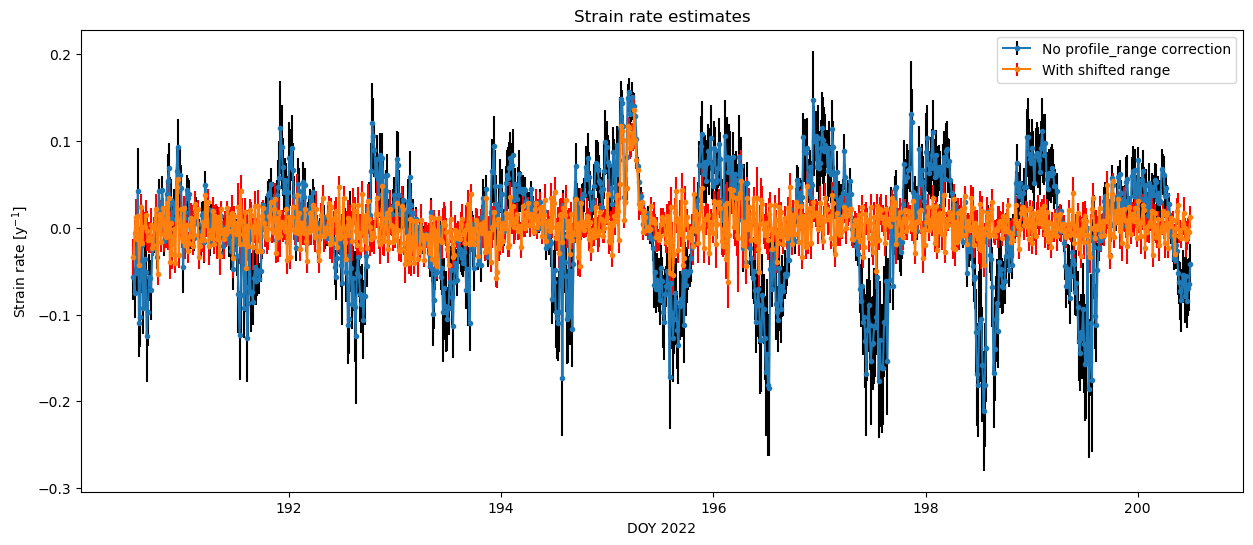

In [158]:
plot_fits(a14,a14_adjust)